# Linear Regression with NumPy and Scikit-Learn & MLP with Keras

## Convenient data loading with keras

In [1]:
import numpy as np

In [2]:
import tensorflow as tf

We are using the Boston Housing dataset.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(seed=17)
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [4]:
x_train.shape, y_train.shape

((404, 13), (404, 1))

In [5]:
x_test.shape, y_test.shape

((102, 13), (102, 1))

## Linear regression with numpy

We have $(x_i^{train}, y_i^{train})_{i=1,\ldots,N}$ with $N=404$ given as the training data where $x_i^{train} \in \mathbb{R}^{13}$ and $y_i^{train} \in \mathbb{R}$.

We want to find a linear map from $\mathbb{R}^{13} \mapsto \mathbb{R}$, represented by the weight matrix $W \in \mathbb{R}^{10 \times 1}$ (or weight vector, in this case) which solves the minimization problem:

$$
W = \text{argmin}_{W^*} \sum_{i=1}^N \| W^* x_i - y_i \|_2^2
$$

Where the loss function we are minimizing is the sum of the mean squared loss (with the L2 norm being $\|x\|_2 = \sqrt{\sum_i |x_i|^2}$).

Some linear algebra gives us the solution to this problem: 

$$
W = (X^T X)^{-1} X^T Y
$$

where $X = [x_0 \ldots x_N]$ and $Y = [y_0 \ldots y_N]$.

In [6]:
w = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train
w.shape

(13, 1)

In [7]:
y_train_pred = x_train @ w
y_test_pred = x_test @ w

Compute the mean absolute error

In [8]:
mae_train = (np.abs(y_train - y_train_pred)).mean()
mae_train

3.3779479358966844

In [9]:
mae_test = (np.abs(y_test - y_test_pred)).mean()
mae_test

3.297429276241864

Compute the mean relative error

In [10]:
mre_train = (np.abs(y_train - y_train_pred) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train))

Mean relative train error: 17.75%


In [11]:
mre_test = (np.abs(y_test - y_test_pred) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test))

Mean relative test error: 17.56%


##  Linear regression with scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_model = LinearRegression().fit(x_train, y_train)
y_train_pred_skl = lin_model.predict(x_train)
y_test_pred_skl = lin_model.predict(x_test)

In [14]:
mre_train_skl = (np.abs(y_train - y_train_pred_skl) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_skl))

Mean relative train error: 16.92%


In [15]:
mre_test_skl = (np.abs(y_test - y_test_pred_skl) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_skl))

Mean relative test error: 16.56%


# Neural network with keras

### First attempt

In [35]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=250,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/250
12/13 [==========================>...] - ETA: 0s - loss: 302428323840.0000 - mae: 158821.7500 - mse: 302428323840.0000

2022-05-13 16:41:58.581133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 15ms/step - loss: 287457280000.0000 - mae: 151140.1406 - mse: 287457280000.0000 - val_loss: 13312137.0000 - val_mae: 3648.5688 - val_mse: 13312137.0000
Epoch 2/250
13/13 [==============================] - 0s 7ms/step - loss: 13006416.0000 - mae: 3606.3354 - mse: 13006416.0000 - val_loss: 12636952.0000 - val_mae: 3554.8376 - val_mse: 12636952.0000
Epoch 3/250
 1/13 [=>............................] - ETA: 0s - loss: 12616010.0000 - mae: 3551.8926 - mse: 12616010.0000

2022-05-13 16:41:58.790435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 7ms/step - loss: 12346730.0000 - mae: 3513.6873 - mse: 12346730.0000 - val_loss: 11996035.0000 - val_mae: 3463.5173 - val_mse: 11996035.0000
Epoch 4/250
13/13 [==============================] - 0s 7ms/step - loss: 11720523.0000 - mae: 3423.4170 - mse: 11720523.0000 - val_loss: 11387611.0000 - val_mae: 3374.5413 - val_mse: 11387611.0000
Epoch 5/250
13/13 [==============================] - 0s 8ms/step - loss: 11126061.0000 - mae: 3335.4712 - mse: 11126061.0000 - val_loss: 10810038.0000 - val_mae: 3287.8496 - val_mse: 10810038.0000
Epoch 6/250
13/13 [==============================] - 0s 7ms/step - loss: 10561744.0000 - mae: 3249.7871 - mse: 10561744.0000 - val_loss: 10261760.0000 - val_mae: 3203.3853 - val_mse: 10261760.0000
Epoch 7/250
13/13 [==============================] - 0s 7ms/step - loss: 10026053.0000 - mae: 3166.2922 - mse: 10026053.0000 - val_loss: 9741294.0000 - val_mae: 3121.0913 - val_mse: 9741294.0000
Epoch 8/250
13/13 [==========

In [36]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

2022-05-13 16:42:20.767293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [37]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 56.54%


In [38]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 55.62%


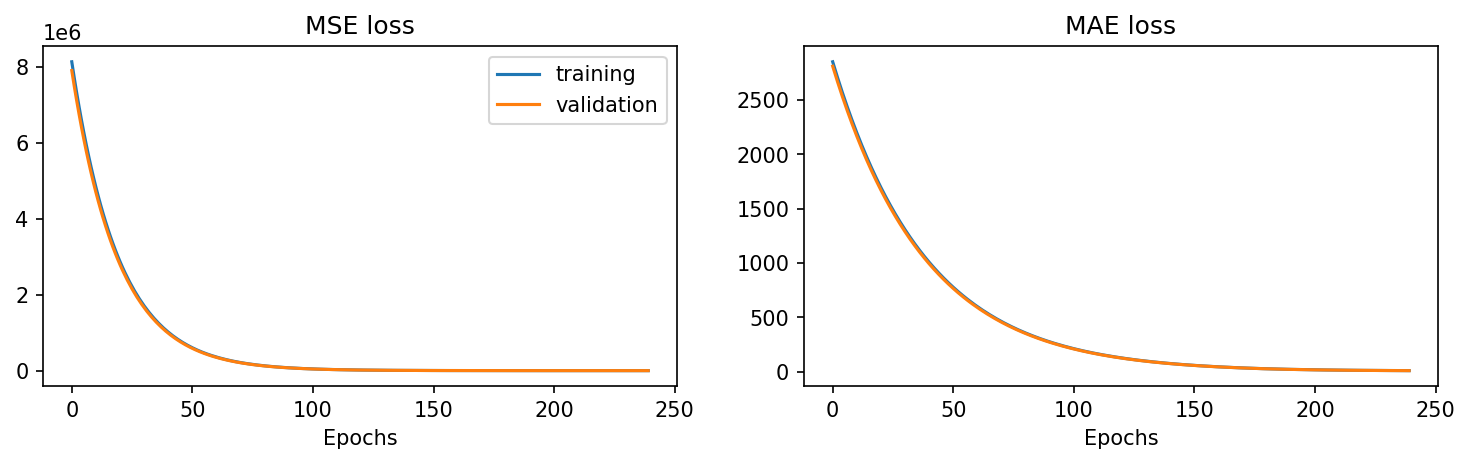

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'][10:], label='training')
ax[0].plot(history.history['val_loss'][10:], label='validation')
ax[1].plot(history.history['mae'][10:])
ax[1].plot(history.history['val_mae'][10:])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()

### Second try

Adding momentum to SGD

In [40]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.95),
    loss='mse',
    metrics=['mae', 'mse']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=250,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/250
13/13 [==============================] - ETA: 0s - loss: 35411084.0000 - mae: 1663.5782 - mse: 35411084.0000

2022-05-13 16:42:28.680157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 16:42:28.873905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 14ms/step - loss: 35411084.0000 - mae: 1663.5782 - mse: 35411084.0000 - val_loss: 326.2761 - val_mae: 16.6134 - val_mse: 326.2761
Epoch 2/250
13/13 [==============================] - 0s 7ms/step - loss: 818.7999 - mae: 26.6395 - mse: 818.7999 - val_loss: 1451.5469 - val_mae: 36.9914 - val_mse: 1451.5469
Epoch 3/250
13/13 [==============================] - 0s 7ms/step - loss: 1867.9265 - mae: 42.1243 - mse: 1867.9265 - val_loss: 2296.4062 - val_mae: 47.0449 - val_mse: 2296.4062
Epoch 4/250
13/13 [==============================] - 0s 7ms/step - loss: 2500.0356 - mae: 49.1346 - mse: 2500.0356 - val_loss: 2686.0417 - val_mae: 51.0182 - val_mse: 2686.0417
Epoch 5/250
13/13 [==============================] - 0s 7ms/step - loss: 2735.7197 - mae: 51.4904 - mse: 2735.7197 - val_loss: 2763.1523 - val_mae: 51.7684 - val_mse: 2763.1523
Epoch 6/250
13/13 [==============================] - 0s 7ms/step - loss: 2726.9028 - mae: 51.3992 - mse: 2726.9028 - val

In [41]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

2022-05-13 16:42:46.430439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [42]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 36.29%


In [43]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 36.53%


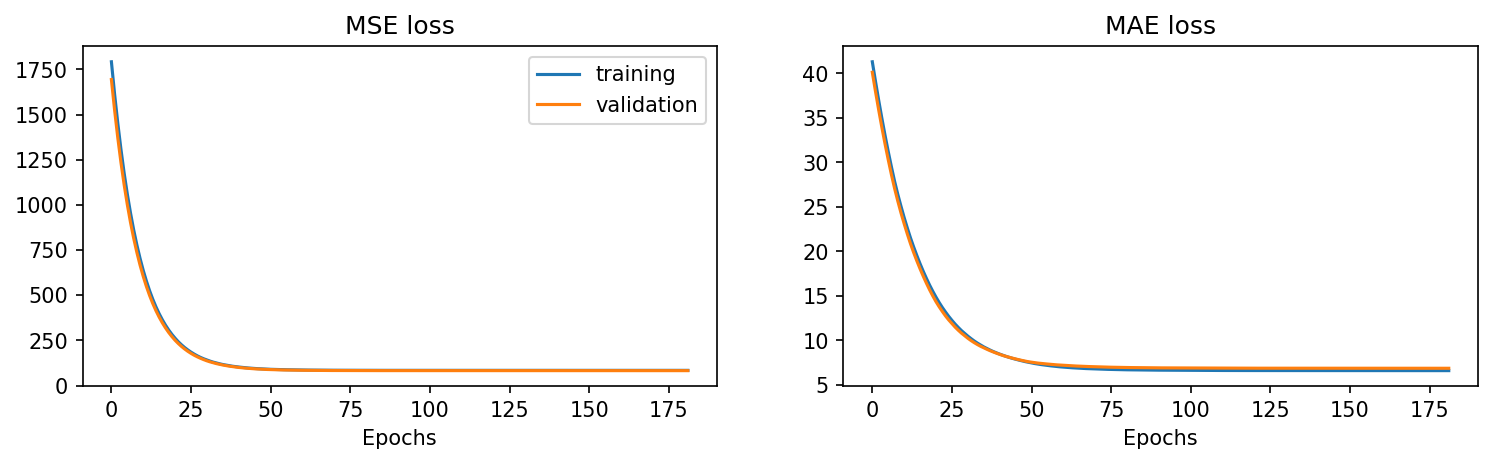

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'][10:], label='training')
ax[0].plot(history.history['val_loss'][10:], label='validation')
ax[1].plot(history.history['mae'][10:])
ax[1].plot(history.history['val_mae'][10:])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()

### Training a bigger network

In [45]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001, momentum=0.9),
    loss='mse',
    metrics=['mae']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    epochs=250,
    validation_split=0.05,
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/250
12/12 [==============================] - ETA: 0s - loss: 1079.0293 - mae: 26.5639

2022-05-13 16:42:52.608856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 16:42:52.792747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 13ms/step - loss: 1079.0293 - mae: 26.5639 - val_loss: 439.3102 - val_mae: 18.9368
Epoch 2/250
12/12 [==============================] - 0s 6ms/step - loss: 272.5432 - mae: 13.4984 - val_loss: 120.2511 - val_mae: 8.5652
Epoch 3/250
12/12 [==============================] - 0s 6ms/step - loss: 99.1144 - mae: 7.2048 - val_loss: 133.3279 - val_mae: 9.8506
Epoch 4/250
12/12 [==============================] - 0s 6ms/step - loss: 80.0350 - mae: 6.8229 - val_loss: 86.6209 - val_mae: 6.6929
Epoch 5/250
12/12 [==============================] - 0s 6ms/step - loss: 75.9914 - mae: 6.4314 - val_loss: 78.8142 - val_mae: 7.0735
Epoch 6/250
12/12 [==============================] - 0s 6ms/step - loss: 71.6191 - mae: 5.8717 - val_loss: 82.8726 - val_mae: 7.4301
Epoch 7/250
12/12 [==============================] - 0s 6ms/step - loss: 70.2717 - mae: 5.9726 - val_loss: 76.9878 - val_mae: 6.7951
Epoch 8/250
12/12 [==============================] - 0s 6ms/step - loss

In [46]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

2022-05-13 16:43:10.626628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [47]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 22.67%


In [48]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 22.69%


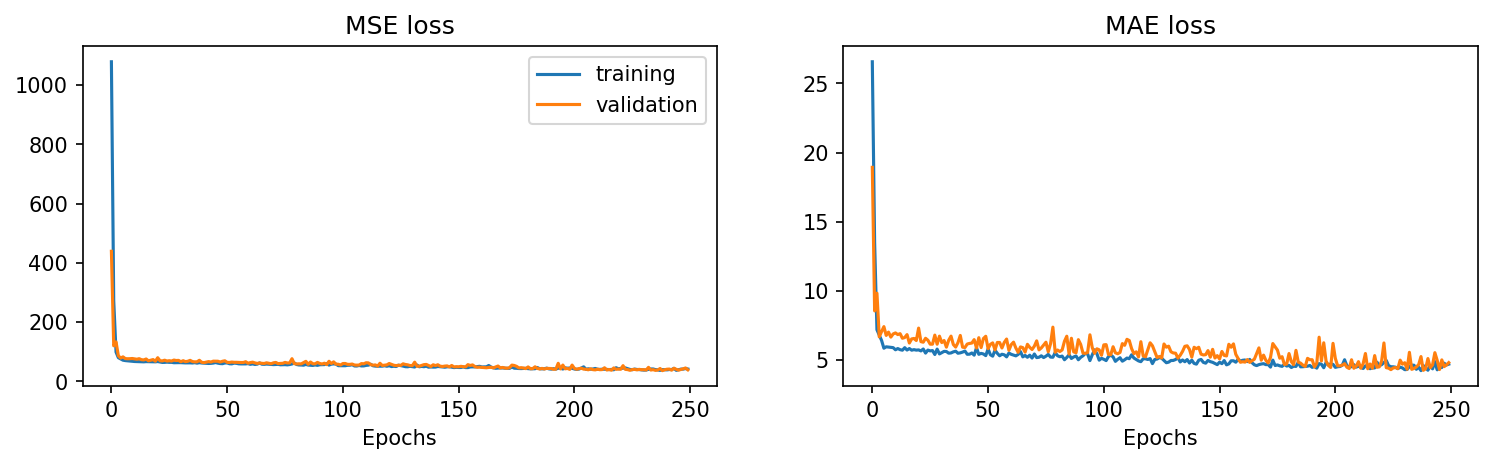

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'], label='training')
ax[0].plot(history.history['val_loss'], label='validation')
ax[1].plot(history.history['mae'])
ax[1].plot(history.history['val_mae'])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()

### Using an advanced optimizer

In [55]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=['mae']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    epochs=250,
    validation_split=0.05,
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/250
11/12 [==========================>...] - ETA: 0s - loss: 1108.0066 - mae: 26.6264

2022-05-13 16:44:00.513363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 14ms/step - loss: 1043.2131 - mae: 25.7006 - val_loss: 223.0483 - val_mae: 11.8031
Epoch 2/250
12/12 [==============================] - 0s 7ms/step - loss: 169.6648 - mae: 10.8706 - val_loss: 144.1469 - val_mae: 10.5630
Epoch 3/250
12/12 [==============================] - 0s 7ms/step - loss: 104.0388 - mae: 7.3553 - val_loss: 92.2051 - val_mae: 7.0515


2022-05-13 16:44:00.726658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 4/250
12/12 [==============================] - 0s 7ms/step - loss: 85.4766 - mae: 7.2710 - val_loss: 85.3936 - val_mae: 7.2755
Epoch 5/250
12/12 [==============================] - 0s 8ms/step - loss: 70.8184 - mae: 5.7839 - val_loss: 74.7182 - val_mae: 6.7277
Epoch 6/250
12/12 [==============================] - 0s 6ms/step - loss: 65.4467 - mae: 6.0143 - val_loss: 73.2686 - val_mae: 6.5762
Epoch 7/250
12/12 [==============================] - 0s 6ms/step - loss: 63.4791 - mae: 5.7502 - val_loss: 68.1533 - val_mae: 6.0460
Epoch 8/250
12/12 [==============================] - 0s 6ms/step - loss: 64.4361 - mae: 5.7021 - val_loss: 72.0197 - val_mae: 6.6970
Epoch 9/250
12/12 [==============================] - 0s 6ms/step - loss: 62.7187 - mae: 5.5783 - val_loss: 64.7053 - val_mae: 5.9725
Epoch 10/250
12/12 [==============================] - 0s 6ms/step - loss: 59.8781 - mae: 5.5308 - val_loss: 60.4124 - val_mae: 5.4956
Epoch 11/250
12/12 [==============================] - 0s 6ms/step - 

In [56]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

2022-05-13 16:44:16.542514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [57]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 12.42%


In [58]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 14.07%


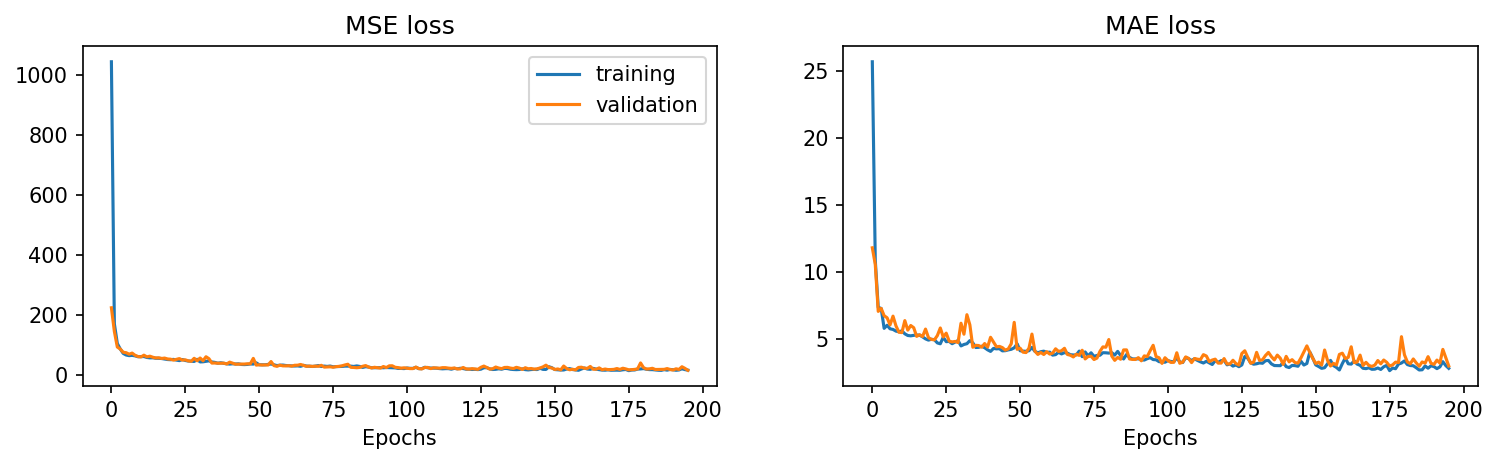

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'], label='training')
ax[0].plot(history.history['val_loss'], label='validation')
ax[1].plot(history.history['mae'])
ax[1].plot(history.history['val_mae'])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()